In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data.csv')

In [5]:
df[['Name', 'Age']]

,Name,Age
0,L. Messi,31
1,Cristiano Ronaldo,33
2,Neymar Jr,26
3,De Gea,27
4,K. De Bruyne,27
...,...,...
18202,J. Lundstram,19
18203,N. Christoffersson,19
18204,B. Worman,16
18205,D. Walker-Rice,17


In [8]:
df[(df["Age"]>35) & (df["Nationality"]=='Brazil')]

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
864,864,153260,Hilton,40,https://cdn.sofifa.org/players/4/19/153260.png,Brazil,https://cdn.sofifa.org/flags/54.png,78,78,Montpellier HSC,...,70.0,83.0,77.0,76.0,12.0,7.0,11.0,12.0,13.0,NaN
926,926,135451,Gomes,37,https://cdn.sofifa.org/players/4/19/135451.png,Brazil,https://cdn.sofifa.org/flags/54.png,77,77,Watford,...,59.0,19.0,14.0,15.0,80.0,72.0,60.0,77.0,83.0,€1.1M
1668,1668,140082,Rafael,36,https://cdn.sofifa.org/players/4/19/140082.png,Brazil,https://cdn.sofifa.org/flags/54.png,75,75,Cagliari,...,60.0,20.0,19.0,17.0,76.0,71.0,63.0,76.0,76.0,€1.5M
1848,1848,165769,Cássio,37,https://cdn.sofifa.org/players/4/19/165769.png,Brazil,https://cdn.sofifa.org/flags/54.png,75,75,Al Taawoun,...,59.0,18.0,17.0,14.0,77.0,74.0,68.0,73.0,76.0,€743K
2940,2940,178571,Bracali,37,https://cdn.sofifa.org/players/4/19/178571.png,Brazil,https://cdn.sofifa.org/flags/54.png,73,73,Boavista FC,...,47.0,16.0,14.0,17.0,75.0,73.0,60.0,74.0,71.0,€567K
7129,7129,205951,Rafinha,36,https://cdn.sofifa.org/players/4/19/205951.png,Brazil,https://cdn.sofifa.org/flags/54.png,68,68,HJK Helsinki,...,76.0,68.0,71.0,72.0,7.0,12.0,13.0,7.0,12.0,€215K
8225,8225,136069,Accioly,37,https://cdn.sofifa.org/players/4/19/136069.png,Brazil,https://cdn.sofifa.org/flags/54.png,67,67,Santa Clara,...,53.0,71.0,67.0,71.0,8.0,6.0,6.0,13.0,10.0,€210K


In [12]:
df1 = pd.DataFrame(df, columns=['Name', 'Wage', 'Value'])
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0

wage = df1['Wage'].replace('[\€,]', '', regex=True).apply(value_to_float)
value = df1['Value'].replace('[\€,]', '', regex=True).apply(value_to_float)
df1['Wage'] = wage
df1['Value'] = value
df1['difference'] = value - wage
df1.sort_values('difference', ascending=False)

,Name,Wage,Value,difference
2,Neymar Jr,290000.0,118500000.0,118210000.0
0,L. Messi,565000.0,110500000.0,109935000.0
4,K. De Bruyne,355000.0,102000000.0,101645000.0
5,E. Hazard,340000.0,93000000.0,92660000.0
15,P. Dybala,205000.0,89000000.0,88795000.0
...,...,...,...,...
17752,S. Phillips,1000.0,0.0,-1000.0
12192,H. Sulaimani,3000.0,0.0,-3000.0
3550,S. Nakamura,4000.0,0.0,-4000.0
4228,B. Nivet,5000.0,0.0,-5000.0


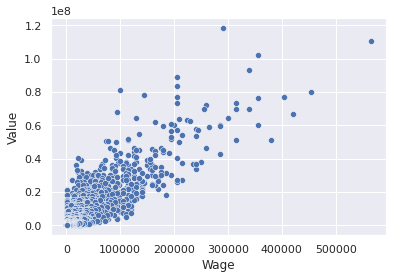

In [13]:
import seaborn as sns
sns.set()

graph = sns.scatterplot(x='Wage', y='Value', data=df1)

In [20]:
from bokeh.plotting import figure, show, output_file
from bokeh.models import HoverTool

TOOLTIPS = HoverTool(tooltips=[
    ("index", "$index"),
    ("(Wage, Value)", "(@Wage, @Value)"),
    ("Name", "@Name")]
)
output_file('index.html')

p = figure(title='Soccer Players 2019', x_axis_label='Wage', y_axis_label='Value', plot_width=700, plot_height=700, tools=[TOOLTIPS])
p.circle('Wage', 'Value', size=10, source=df1)
show(p)